In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 8, 10
# matplotlib.rcParams.update({'font.size': 10})

import warnings
warnings.filterwarnings('ignore')

In [2]:
def evaluate_preds(true_value, pred_value):
    print(f'R2:\t{round(r2(true_value, pred_value), 3)}')
    
    plt.figure(figsize=(6, 5))
    
    sns.scatterplot(x=pred_value, y=true_value)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [3]:
PREPARED_X_TRAIN_DATASET_PATH = 'CourseWork/x_train_prepared_iter3.csv'
PREPARED_Y_TRAIN_DATASET_PATH = 'CourseWork/y_train_prepared_iter3.csv'

PREPARED_TEST_DATASET_PATH = 'CourseWork/test_prepared_iter3.csv'
PREDICTED_TEST_DATASET_PATH = 'CourseWork/test_predicted_final_iter.csv'

In [4]:
X = pd.read_csv(PREPARED_X_TRAIN_DATASET_PATH)
y = pd.read_csv(PREPARED_Y_TRAIN_DATASET_PATH)
X_test = pd.read_csv(PREPARED_TEST_DATASET_PATH)

In [5]:
X.set_index('Id', inplace=True)
y.set_index('Id', inplace=True)

X_test.set_index('Id', inplace=True)

In [6]:
scaler = StandardScaler()

In [37]:
# print(X.columns.tolist())

['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']


In [10]:
cols_for_scale = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1']

In [11]:
X[cols_for_scale] = scaler.fit_transform(X[cols_for_scale])

In [12]:
X_test[cols_for_scale] = scaler.transform(X_test[cols_for_scale])

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
y_pred = y_valid.copy()

In [7]:
# feats_for_predicts = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
#                      'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
#                     'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

In [7]:
feats_for_predicts = ['DistrictId', 'Rooms', 'Square', 'Floor', 'HouseFloor', 'HouseYear',
                      'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
                      'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

In [103]:
feats_for_predicts_2 = ['DistrictId', 'Rooms', 'Square', 'Floor', 'HouseFloor', 'HouseYear',
                        'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1']

In [87]:
rf = RandomForestRegressor(random_state=42)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
params = {'n_estimators': [800, 1000, 1200], 'max_depth': [14, 16, 18], 'max_features': [3, 5, 7]}

gs = GridSearchCV(rf, params, scoring='r2', cv=KFold(n_splits=3, random_state=42, shuffle=True), n_jobs=-1)
gs.fit(X[feats_for_predicts], y)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [800, 1000, 1200], 'max_depth': [14, 16, 18], 'max_features': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [47]:
gs.best_params_ # {'max_depth': 16, 'max_features': 5, 'n_estimators': 1000}

{'max_depth': 16, 'max_features': 5, 'n_estimators': 1000}

In [48]:
gs.best_score_ # 0.724123608733753

0.724123608733753

In [14]:
rf = RandomForestRegressor(random_state=42, max_depth=16, max_features=5, n_estimators=1000)

In [15]:
rf.fit(X_train[feats_for_predicts_2], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=42, verbose=0, warm_start=False)

In [16]:
feature_importances = pd.DataFrame(zip(X_train[feats_for_predicts_2].columns, rf.feature_importances_),
                                   columns=['FeatureName', 'Importance'])
feature_importances.sort_values(by='Importance', ascending=False)

,FeatureName,Importance
2,Square,0.263234
1,Rooms,0.189614
8,Social_2,0.077674
7,Social_1,0.074543
9,Social_3,0.066068
5,HouseYear,0.061756
0,DistrictId,0.056536
4,HouseFloor,0.049175
6,Ecology_1,0.039020
10,Healthcare_1,0.037869


Text(0, 0.5, 'Признак')

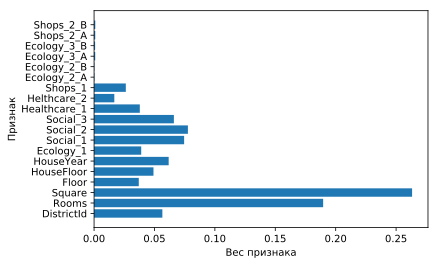

In [17]:
plt.barh(X[feats_for_predicts_2].columns, rf.feature_importances_)
plt.xlabel('Вес признака')
plt.ylabel('Признак')

R2:	0.955


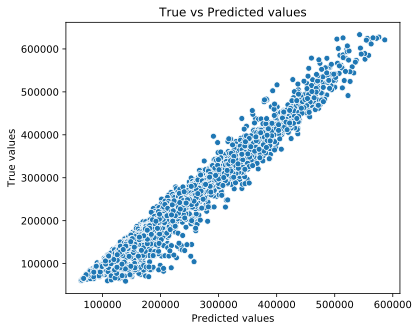

In [18]:
y_rf_pred_train = rf.predict(X_train[feats_for_predicts_2])
evaluate_preds(y_train.Price, y_rf_pred_train.flatten())

R2:	0.703


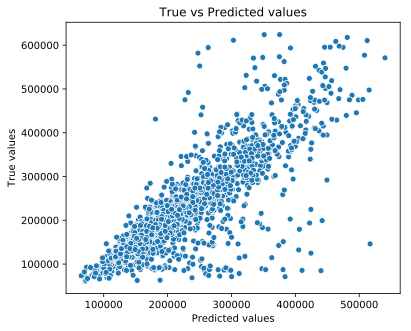

In [19]:
y_rf_pred = rf.predict(X_valid[feats_for_predicts_2])
evaluate_preds(y_valid.Price, y_rf_pred.flatten())

In [142]:
X_test['Price'] = rf.predict(X_test[feats_for_predicts_2])

In [129]:
X_test.reset_index(inplace=True)

In [144]:
X_test[['Id', 'Price']].to_csv(PREDICTED_TEST_DATASET_PATH, index=False)

In [145]:
df = pd.read_csv(PREDICTED_TEST_DATASET_PATH)
df.head()

,725,164288.40278712322
0,15856,235192.095390
1,5480,371645.481727
2,15664,329668.402217
3,14275,143636.521178
4,7633,205998.546429
